In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Esta funcion obtiene el camino con mayor peso, nodo por nodo, y escoge el que tenga el mayor peso 

def mayorCamino(W, bandera):
    
    temp = 0
    indice_i = 0
    indice_j = 0
    L = []
    LL = []
    
    for i in range(n):
        
        for j in range(m):
            
            temp1, lista, listaIndices = caminoDadoPivote(W, i, j)
            
            if temp < temp1:
                
                L = lista
                LL = listaIndices
                temp = temp1
                indice_i = i
                indice_j = j
    
    if bandera:
        print("El camino con mayor peso es:", L)
    else:
        print("El camino con mayor peso es...")
    print("El cual tiene un peso de:", temp)
    print("La geodesica es la trayectoria que pasa por el nodo: W[{}, {}] = {:.2f}".format(indice_i, indice_j, W[indice_i, indice_j]))
            
    return temp, L, LL, indice_i, indice_j            

In [3]:
# #Esta funcion obtiene el camino (completo) con mayor peso que pasa por el nodo i, j

def caminoDadoPivote(W, i, j):
    
    #print("ADELANTE")
    suma1, lista1, listaIndices1 = adelante(W, i, j, 0, [], [])
    #print("ATRAS")
    suma2, lista2, listaIndices2 = atras(W, i, j, 0, [], [])
    suma = suma1 + suma2 - W[i, j]
    L = []
    LL = []
    
    for i in range(1, len(lista2)):
        
        L.append(lista2[-i])
        
    for i in range(len(lista1)):
        
        L.append(lista1[i])
        
    for i in range(1, len(listaIndices2)):
        
        LL.append(listaIndices2[-i])
        
    for i in range(len(listaIndices1)):
        
        LL.append(listaIndices1[i])
    
    return suma, L, LL

In [4]:
# #Funcion adelante
# #Esta función nos ayuda a calcular el camino con mayor peso que al nodo superior derecho
# #partiendo del nodo i, j

def adelante(W, i, j, suma, L, LL):
    
    n, m = W.shape
    
    if i == 0 and m - 1 == j:
        
        #print(W[0,m - 1])
        suma += W[0,m - 1]
        L.append(W[0, m - 1])
        LL.append((i, j))
        i = 0
        j = m-1
        
        return suma, L, LL
    
    elif i == 0:
        
        pivote = W[i, j]
        #print(pivote)
        suma += pivote
        L.append(pivote)
        LL.append((i, j))
        suma, L, LL = adelante(W, i, j + 1, suma, L, LL)

        return suma, L, LL
        
    elif j == m - 1:
        
        pivote = W[i, j]
        #print(pivote)
        suma += pivote
        L.append(pivote)
        LL.append((i,j))
        suma, L, LL = adelante(W, i - 1, j, suma, L, LL)
        
        return suma, L, LL
        
    else:
        
        pivote = W[i, j]
        #print(pivote)
        suma += pivote
        L.append(pivote)
        LL.append((i, j))
        
        if W[i - 1, j] < W[i, j + 1]:
            
            suma, L, LL = adelante(W, i, j + 1, suma, L, LL)
            
        else:
            
            suma, L, LL = adelante(W, i - 1, j, suma, L, LL)
            
        return suma, L, LL

In [5]:
# Funcion atras
# Esta función nos ayuda a calcular el camino con mayor peso que llega al nodo i, j 
# partiendo del nodo inderior izquierdo

def atras(W, i, j, suma, L, LL):
    
    n, m = W.shape
    
    if i == n-1 and 0 == j:
        
        #print(W[n-1, 0])
        suma += W[n-1,0]
        L.append(W[n-1, 0])
        LL.append((i, j))
        i = n - 1
        j = 0
        
        return suma, L, LL
    
    elif i == n - 1:
        
        pivote = W[i, j]
        #print(pivote)
        suma += pivote
        L.append(pivote)
        LL.append((i, j))
        suma, L, LL = atras(W, i, j - 1, suma, L, LL)
        
        return suma, L, LL
    
    elif j == 0:
        
        pivote = W[i, j]
        #print(pivote)
        suma += pivote
        L.append(pivote)
        LL.append((i, j))
        suma, L, LL = atras(W, i + 1, j, suma, L, LL)
        
        return suma, L, LL
    
    else:
        
        pivote = W[i, j]
        #print(pivote)
        suma+= pivote
        L.append(pivote)
        LL.append((i, j))
        
        if W[i + 1, j] < W[i, j - 1]:
            
            suma, L, LL = atras(W, i, j - 1, suma, L, LL)
            
        else:
            
            suma, L, LL = atras(W, i + 1, j, suma, L, LL)
        
        return suma, L, LL

In [6]:
n, m = 5, 4
W = np.random.exponential(scale = 1, size = (n, m))

In [7]:
W

array([[0.09320027, 1.1150813 , 0.71605356, 1.15231456],
       [0.01933274, 0.19035526, 1.66060334, 0.04760427],
       [0.27142381, 0.38609782, 1.47411209, 0.11523318],
       [0.76963217, 1.10461539, 1.02917666, 1.01457679],
       [1.79893547, 2.09571622, 0.46172578, 0.2269349 ]])

In [8]:
inicio = time.time()
suma, L, LL, i, j = mayorCamino(W, True)
print("--- %s segundos ---" % (time.time() - inicio))

El camino con mayor peso es: [1.7989354707350502, 2.0957162163009038, 1.1046153937711358, 1.0291766585953182, 1.474112091133501, 1.6606033447464836, 0.7160535611052227, 1.152314562167224]
El cual tiene un peso de: 11.031527298554842
La geodesica es la trayectoria que pasa por el nodo: W[4, 0] = 1.80
--- 0.0006890296936035156 segundos ---


In [9]:
inicio = time.time()
n = 1000
for i in range(5):
    W = np.random.exponential(scale = 1, size = (n, n))
    suma, L, LL, i, j = mayorCamino(W, False)
    print("#####################################")

print("--- %s segundos ---" % (time.time() - inicio))

El camino con mayor peso es...
El cual tiene un peso de: 2985.183652828211
La geodesica es la trayectoria que pasa por el nodo: W[927, 2] = 0.40
#####################################
El camino con mayor peso es...
El cual tiene un peso de: 3107.6493368124775
La geodesica es la trayectoria que pasa por el nodo: W[980, 3] = 0.05
#####################################
El camino con mayor peso es...
El cual tiene un peso de: 2974.562629760099
La geodesica es la trayectoria que pasa por el nodo: W[887, 1] = 1.48
#####################################
El camino con mayor peso es...
El cual tiene un peso de: 3040.387813658075
La geodesica es la trayectoria que pasa por el nodo: W[999, 1] = 0.81
#####################################
El camino con mayor peso es...
El cual tiene un peso de: 2971.372978786128
La geodesica es la trayectoria que pasa por el nodo: W[973, 3] = 0.25
#####################################
--- 39.27838134765625 segundos ---


Podemos ver que para $n$ suficientemente grande $L(n,n) \approx 3n$

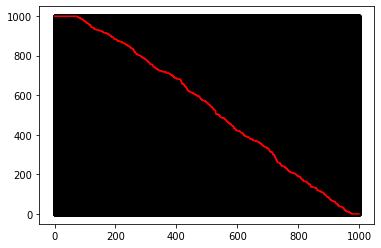

In [10]:
x = [i for i in range(n)]
for i in range(n):
    y = [i for j in range(n)]
    plt.plot(x, y, '.', color = 'k')
X = []
Y = []
for i in LL:
    X.append(i[0])
    Y.append(i[1])
plt.plot(X, Y, color = 'r');

La geodésica parece tomar una linea recta entre los nodos de ambas esquinas, lo cual podemos considerar que se debe a que como tenemos que nuestros pesos están dados por una variable aleatoria y como nuestra n es bastante grande entonces por el teorema de límite central podemos considerar que nuestra distribución es normal, lo cual implica que "arriba" de la diagonal tenemos practicamente (en conjunto) el mismo peso que "debajo" de la diagonal. Por ello la geodésica no toma una clara tendencia a irse por debajo o arriba sino que oscila entre puntos cercanos a la diagonal.